## Observations and Insights 

In [1]:
# dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from jupyterthemes import jtplot
jtplot.style()

# study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine the data into a single dataset
df_mouse_merge = mouse_metadata.merge(study_results, left_on = 'Mouse ID', right_on = 'Mouse ID')

# display the data table for preview
df_mouse_merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# checking the number of mice.
mouse_qty = len(pd.unique(df_mouse_merge['Mouse ID']))
mouse_qty

249

In [3]:
# getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df_mouse_merge.loc[df_mouse_merge.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# optional: Get all the data for the duplicate mouse ID. 
show_duplicates = df_mouse_merge.loc[df_mouse_merge['Mouse ID'] == 'g989']
show_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = df_mouse_merge.drop_duplicates().reset_index(drop=True)
clean_df = clean_mouse[clean_mouse['Mouse ID'].isin(duplicate_mouse)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# checking the number of mice in the clean DataFrame.
mouse_qty = clean_df['Mouse ID'].nunique()
mouse_qty

248

## Summary Statistics

In [7]:
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# assemble the resulting series into a single summary dataframe.

mean_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_stat= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean': mean_stat, 'Median': median_stat, 'Variance': var_stat, 'Std. Dev.': stdv_stat, 'SEM': sem_stat})
summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# using the aggregation method, produce the same summary statistics in a single line
agg_group = clean_df.groupby('Drug Regimen')
agg_summary = agg_group.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

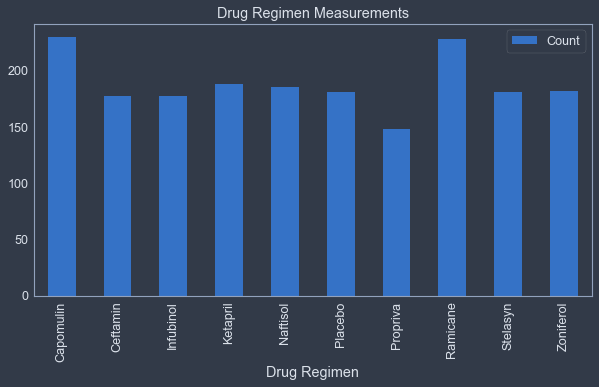

In [9]:
# generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_df = clean_df.groupby(['Drug Regimen']).count().reset_index()
regimen_data = regimen_df[['Drug Regimen', 'Mouse ID']].rename(columns={"Mouse ID": "Count"})

regimen_data = regimen_data.set_index('Drug Regimen')

regimen_data.plot(kind='bar', figsize=(10,5))

# hide grid lines
plt.grid(b=None)

plt.title('Drug Regimen Measurements')
plt.show()

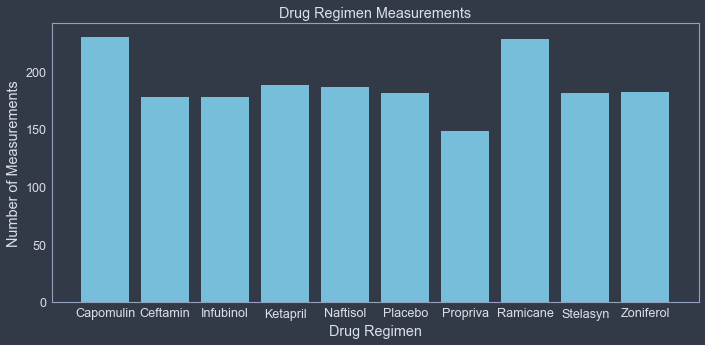

In [10]:
# generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# create drug regiment data set
regimen_list = summary_df.index.tolist()
x_axis = regimen_list

# create regimen count
regimen_count = (clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()

# format figure Size
fig = plt.figure(figsize =(10, 5))

# format title
plt.title('Drug Regimen Measurements')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

# hide grid lines
plt.grid(b=None)

# plot bar chart
plt.bar(x_axis, regimen_count, color='c', alpha=1, align='center')
plt.tight_layout()

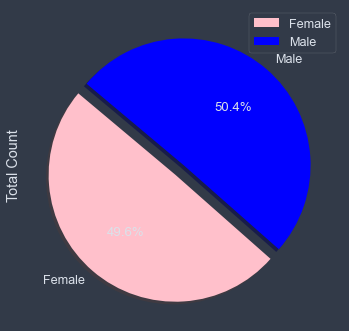

In [11]:
# generate a pie plot showing the distribution of female versus male mice using pandas
# create dataframe grouping unique players by Gender
gender_count = pd.DataFrame(clean_df.groupby('Sex')['Mouse ID'].nunique())

# rename column
gender_count = gender_count.rename(columns={'Mouse ID':'Total Count'})

# add column Percentage and calculate gender percentage
gender_count['Percentage Split'] = gender_count['Total Count'] / sum(gender_count['Total Count'])

# plot
colors = ['pink', 'blue']
explode = (0.1, 0)
plot = gender_count.plot.pie(y='Total Count', figsize=(5, 5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.tight_layout()

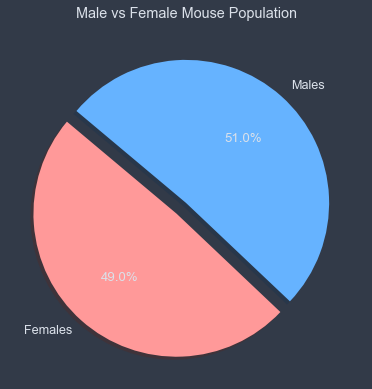

In [12]:
# generate a pie plot showing the distribution of female versus male mice using pyplot
# gender count female, male
gender_count = (clean_df.groupby(['Sex'])['Mouse ID'].count()).tolist()

# labels for the sections of the pie chart
labels = ['Females', 'Males']
plt.title('Male vs Female Mouse Population')

# the values of each section of the pie chart
sizes = gender_count

# colors each section of the pie chart
colors = ['#ff9999','#66b3ff']

# tells matplotlib not to seperate the sections
explode = (0.1, 0)

# creates the pie chart based upon the values above
# automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# display data headers 
#clean_df.head()

In [14]:
# calculate the final tumor volume of each mouse across four of the treatment regimens:  
# capomulin, Ramicane, Infubinol, and Ceftamin

capo_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
rami_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',:]
infu_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',:]
ceft_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin',:]

In [42]:
# start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.groupby('Mouse ID').max()['Timepoint']
# merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = pd.merge(max_time, clean_df, on= ('Mouse ID', 'Timepoint'),how='left')

#print(merge_data)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

In [ ]:
# calculate the IQR and quantitatively determine if there are any potential outliers. 

# capomulin IQR
capo_quar = capo_merge["Tumor Volume (mm3)"]
quartiles = capo_quar.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[.5]} ")

# Locate the rows which contain mice on each drug and get the tumor volumes
    
#####capo_tumor_list = capo_merge(['Tumor Volume (mm3)'].reset_index
#capo_tumor_list = capo_tumor_list['Tumor Volume (mm3)']
#capo_tumor_list
    # add subset 
#####    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# ramicane. Merge df with original df (clean_df) to find tumor volume
rami_max = rami_df.groupby('Mouse ID').max()['Timepoint']
rami_vol = pd.DataFrame(rami_max)
rami_merge = pd.merge(rami_vol, clean_df, on=('Mouse ID', 'Timepoint'),how='left')
rami_merge.head()

In [ ]:
# infubinol. Merge df with original df (clean_df) to find tumor volume. 
infu_max = infu_df.groupby('Mouse ID').max()['Timepoint']
infu_vol = pd.DataFrame(infu_max)
infu_merge = pd.merge(rami_vol, clean_df, on=('Mouse ID', 'Timepoint'),how='left')
infu_merge.head()

In [ ]:
# ceftamin. Merge df with original df (clean_df) to find tumor volume. 
ceft_max = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_vol = pd.DataFrame(ceft_max)
ceft_merge = pd.merge(ceft_vol, clean_df, on=('Mouse ID', 'Timepoint'),how='left')
ceft_merge.head()

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
# put treatments into a list for for loop (and later for plot labels)
drug_list = clean_df['Drug Regimen'].tolist()
unique_drug = drug_list
unique_drug = list(set(unique_drug))
unique_drug

In [ ]:
# create empty list to fill with tumor vol data (for plotting)
empty_tumor_list = []

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
